In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
from tqdm.notebook import tqdm
import random

In [2]:
WIDTH = 236
HEIGHT = 137
CENTER_X = WIDTH//2
CENTER_Y = HEIGHT//2
PREFIX = 'Font_'
DATASET_ROOT = './font_images/'

In [3]:
os.makedirs(DATASET_ROOT, exist_ok=True)

In [4]:
class_map = pd.read_csv('../input/bengaliai-cv19/class_map.csv')
grapheme_root = class_map[class_map['component_type'] == 'grapheme_root']
vowel_diacritic = class_map[class_map['component_type'] == 'vowel_diacritic']
consonant_diacritic = class_map[class_map['component_type'] == 'consonant_diacritic']
grapheme_root_list = grapheme_root['component'].tolist()
vowel_diacritic_list = vowel_diacritic['component'].tolist()
consonant_diacritic_list = consonant_diacritic['component'].tolist()

In [5]:
def label_to_grapheme(grapheme_root, vowel_diacritic, consonant_diacritic):
    if consonant_diacritic == 0:
        if vowel_diacritic == 0:
            return grapheme_root_list[grapheme_root]
        else:
            return grapheme_root_list[grapheme_root] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 1:
        if vowel_diacritic == 0:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic]
        else:
            return grapheme_root_list[grapheme_root] + vowel_diacritic_list[vowel_diacritic] + consonant_diacritic_list[consonant_diacritic]
    elif consonant_diacritic == 2:
        if vowel_diacritic == 0:
            return consonant_diacritic_list[consonant_diacritic] + grapheme_root_list[grapheme_root]
        else:
            return consonant_diacritic_list[consonant_diacritic] + grapheme_root_list[grapheme_root] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 3:
        if vowel_diacritic == 0:
            return consonant_diacritic_list[consonant_diacritic][:2] + grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic][1:]
        else:
            return consonant_diacritic_list[consonant_diacritic][:2] + grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic][1:] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 4:
        if vowel_diacritic == 0:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic]
        else:
            if grapheme_root == 123 and vowel_diacritic == 1:
                return grapheme_root_list[grapheme_root] + '\u200d' + consonant_diacritic_list[consonant_diacritic] + vowel_diacritic_list[vowel_diacritic]
            return grapheme_root_list[grapheme_root]  + consonant_diacritic_list[consonant_diacritic] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 5:
        if vowel_diacritic == 0:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic]
        else:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 6:
        if vowel_diacritic == 0:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic]
        else:
            return grapheme_root_list[grapheme_root] + consonant_diacritic_list[consonant_diacritic] + vowel_diacritic_list[vowel_diacritic]
    elif consonant_diacritic == 7:
        if vowel_diacritic == 0:
            return consonant_diacritic_list[2] + grapheme_root_list[grapheme_root] + consonant_diacritic_list[2][::-1]
        else:
            return consonant_diacritic_list[2] + grapheme_root_list[grapheme_root] + consonant_diacritic_list[2][::-1] + vowel_diacritic_list[vowel_diacritic]

In [6]:
def grapheme_to_image(grapheme, font):
    width, height = font.getsize(grapheme)
    image = Image.new(size=(WIDTH, HEIGHT), mode='L', color=255)
    draw = ImageDraw.Draw(image)
    x, y = CENTER_X-width//2, CENTER_Y-height//2
    draw.text((x, y), grapheme, font=font)
    return image

In [7]:
grapheme_to_label = {}
alphabet = []
for grapheme_root in range(168):
    for vowel_diacritic in range(11):
        for consonant_diacritic in range(8):
            grapheme_to_label[label_to_grapheme(grapheme_root, vowel_diacritic, consonant_diacritic)] = (grapheme_root, vowel_diacritic, consonant_diacritic)
            alphabet.append(label_to_grapheme(grapheme_root, vowel_diacritic, consonant_diacritic))

In [8]:
data = pd.read_csv('../input/bengaliai-cv19/train.csv')
image_data = pd.read_parquet('../input/bengaliai-cv19/train_image_data_0.parquet', memory_map=True)

In [9]:
data.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [10]:
image_data.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


In [11]:
font_list = [
    '../input/fonts/kalpurush.ttf',
]

In [12]:
font_list

['../input/fonts/kalpurush.ttf']

In [13]:
size_list = [
    84,
    96,
    108,
    120,
]

In [14]:
print(alphabet)

['ং', 'ংঁ', 'র্ং', 'র্ং্য', 'ং্য', 'ং্র', 'ং্র্য', 'র্ং্র', 'ংা', 'ংাঁ', 'র্ংা', 'র্ং্যা', 'ং্যা', 'ং্রা', 'ং্র্যা', 'র্ং্রা', 'ংি', 'ংিঁ', 'র্ংি', 'র্ং্যি', 'ং্যি', 'ং্রি', 'ং্র্যি', 'র্ং্রি', 'ংী', 'ংীঁ', 'র্ংী', 'র্ং্যী', 'ং্যী', 'ং্রী', 'ং্র্যী', 'র্ং্রী', 'ংু', 'ংুঁ', 'র্ংু', 'র্ং্যু', 'ং্যু', 'ং্রু', 'ং্র্যু', 'র্ং্রু', 'ংূ', 'ংূঁ', 'র্ংূ', 'র্ং্যূ', 'ং্যূ', 'ং্রূ', 'ং্র্যূ', 'র্ং্রূ', 'ংৃ', 'ংৃঁ', 'র্ংৃ', 'র্ং্যৃ', 'ং্যৃ', 'ং্রৃ', 'ং্র্যৃ', 'র্ং্রৃ', 'ংে', 'ংেঁ', 'র্ংে', 'র্ং্যে', 'ং্যে', 'ং্রে', 'ং্র্যে', 'র্ং্রে', 'ংৈ', 'ংৈঁ', 'র্ংৈ', 'র্ং্যৈ', 'ং্যৈ', 'ং্রৈ', 'ং্র্যৈ', 'র্ং্রৈ', 'ংো', 'ংোঁ', 'র্ংো', 'র্ং্যো', 'ং্যো', 'ং্রো', 'ং্র্যো', 'র্ং্রো', 'ংৌ', 'ংৌঁ', 'র্ংৌ', 'র্ং্যৌ', 'ং্যৌ', 'ং্রৌ', 'ং্র্যৌ', 'র্ং্রৌ', 'ঃ', 'ঃঁ', 'র্ঃ', 'র্ঃ্য', 'ঃ্য', 'ঃ্র', 'ঃ্র্য', 'র্ঃ্র', 'ঃা', 'ঃাঁ', 'র্ঃা', 'র্ঃ্যা', 'ঃ্যা', 'ঃ্রা', 'ঃ্র্যা', 'র্ঃ্রা', 'ঃি', 'ঃিঁ', 'র্ঃি', 'র্ঃ্যি', 'ঃ্যি', 'ঃ্রি', 'ঃ্র্যি', 'র্ঃ্রি', 'ঃী', 'ঃীঁ', 'র্ঃী', 'র্ঃ্যী', 'ঃ্যী', 'ঃ্রী', 'ঃ্র্যী', 'র্ঃ্রী', 'ঃু', 'ঃুঁ

In [15]:
len(font_list)*len(size_list)*len(alphabet)

14784

গ্ন্র্যৈ


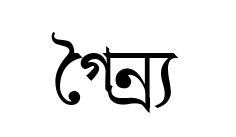

উৈ


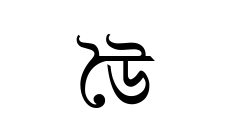

র্ম্প্র


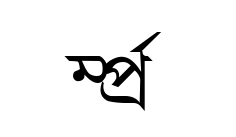

উো


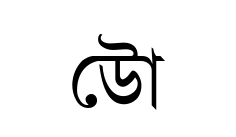

র্ষো


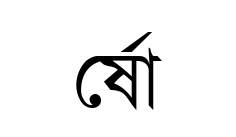

ষ্ফ্রী


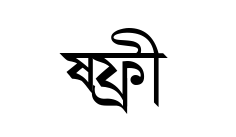

ঘ্যো


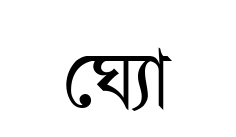

ল্ম্রৃ


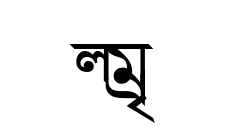

ণ্ণ্রি


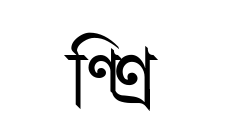

ক্কৌ


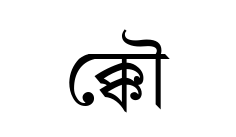

In [16]:
for i in range(10):
    font_path = random.choice(font_list)

    size = random.choice(size_list)
    font = ImageFont.truetype(font_path, layout_engine=ImageFont.LAYOUT_RAQM, size=size)

    c = random.choice(alphabet)
    grapheme_root, vowel_diacritic, consonant_diacritic = grapheme_to_label[c]

    grapheme = label_to_grapheme(grapheme_root, vowel_diacritic, consonant_diacritic)
    image = grapheme_to_image(grapheme, font)
    print(grapheme)
    display(image)
    
    
    

In [41]:
idx = 0
raw_font_data = []
raw_pixel_data = []

for size in size_list:
    for font_path in font_list:
        font = ImageFont.truetype(font_path, layout_engine=ImageFont.LAYOUT_RAQM, size=size)
        for c in tqdm(alphabet):
            grapheme_root, vowel_diacritic, consonant_diacritic = grapheme_to_label[c]

            grapheme = label_to_grapheme(grapheme_root, vowel_diacritic, consonant_diacritic)
            image = grapheme_to_image(grapheme, font)
            image_id = PREFIX+str(idx)
            image_data = {
                'image_id': image_id,
                'grapheme_root': grapheme_root,
                'vowel_diacritic': vowel_diacritic,
                'consonant_diacritic': consonant_diacritic,
                'grapheme': grapheme
            }
            pixel_data = np.array(image).reshape(-1)
            raw_font_data.append(image_data)
            raw_pixel_data.append(pixel_data)
            idx += 1
            
            
font_data = pd.DataFrame(raw_font_data)
font_image_data = font_data[['image_id']]
pixel_data = pd.DataFrame(np.array(raw_pixel_data), columns=[str(i) for i in range(WIDTH*HEIGHT)])
font_image_data = font_image_data.join(pixel_data)

In [42]:
font_data

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Font_0,0,0,0,ং
1,Font_1,0,0,1,ংঁ
2,Font_2,0,0,2,র্ং
3,Font_3,0,0,3,র্ং্য
4,Font_4,0,0,4,ং্য
...,...,...,...,...,...
14779,Font_14779,167,10,3,র্য়্যৌ
14780,Font_14780,167,10,4,য়্যৌ
14781,Font_14781,167,10,5,য়্রৌ
14782,Font_14782,167,10,6,য়্র্যৌ


In [43]:
font_image_data

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Font_0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,Font_1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,Font_2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,Font_3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,Font_4,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14779,Font_14779,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14780,Font_14780,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14781,Font_14781,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14782,Font_14782,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [44]:
font_data.to_csv(os.path.join(DATASET_ROOT, 'font.csv'), index=False)
font_image_data.to_parquet(os.path.join(DATASET_ROOT, 'font_image_data_0.parquet'))